# Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

#### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

## 1. Load the dataset and explore the variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Create a DataFrame with the model variables

customers = data[['SeniorCitizen','tenure','MonthlyCharges','Churn']]
customers

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [6]:
# Convert all column names to lowercase

customers.columns = customers.columns.str.lower()
customers.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'churn'], dtype='object')

In [7]:
# Rename specific columns

customers.rename(columns={'seniorcitizen': 'senior_citizen', 'monthlycharges': 'monthly_charges'}, inplace=True)

In [8]:
# This function 'transform_churn' is defined to convert the 'churn' values from 'Yes' to 1 and 'No' to 0.
# It is then applied to the 'churn' column using the map() function to transform the values in that column.
# This step converts the target variable 'churn' into a binary format, where 1 represents 'Yes' and 0 represents 'No'.
# The result is displayed using 'customers.head()' to show the updated DataFrame.

def transform_churn(x):
    if x == 'Yes':
        return 1
    else:
        return 0

customers['churn'] = list(map(transform_churn,customers['churn']))
customers.head()

,senior_citizen,tenure,monthly_charges,churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [9]:
customers.head()

,senior_citizen,tenure,monthly_charges,churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [10]:
customers.shape

(7043, 4)

In [11]:
# Get the dtypes and Nulls count

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7043 non-null   int64  
 1   tenure           7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
 3   churn            7043 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 220.2 KB


In [12]:
# No nulls

In [13]:
# Checking for duplicate rows

duplicates = customers.duplicated()

In [14]:
# Counting the number of duplicate rows

num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 477


In [15]:
# Extracting the duplicate rows for further analysis

duplicate_rows = customers[duplicates]
duplicate_rows

,senior_citizen,tenure,monthly_charges,churn
100,0,1,20.20,0
222,0,1,20.20,0
272,0,1,24.80,1
420,0,5,24.30,0
623,0,20,19.70,0
...,...,...,...,...
6969,0,1,20.50,1
6977,0,24,49.70,0
6985,0,37,40.20,0
7010,1,1,74.45,1


Despite having 477 duplicate rows out of a total of 7043, I decide not to delete the duplicated rows based on the uncertainty of whether they represent errors or valid data, as I do not have enough information to determine this with certainty.

##  Explore the variables:

In [16]:
customers["churn"].unique()

array([0, 1])

In [17]:
# Explore the target distribution to see if the dataset is unbalanced.

customers['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

<Axes: >

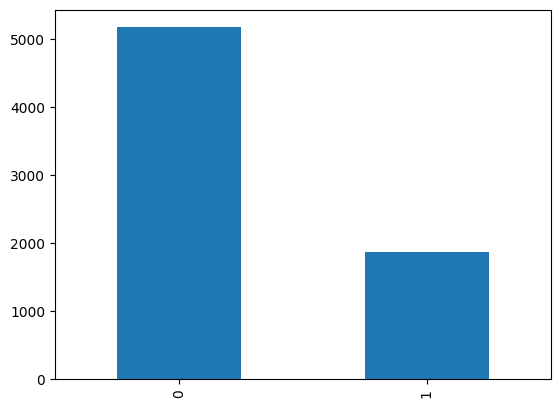

In [18]:
balance_target = pd.value_counts(customers['churn'])
balance_target.plot(kind = 'bar')

The "0" class (customer has not canceled their subscription) has many more instances than the "1" class (subscription cancellation), indicating a **SIGNIFICANT IMBALANCE**. This imbalance can impact the model's ability to accurately predict the minority class ("1" in this case). Therefore, it's important to address this imbalance when building and evaluating machine learning models to avoid biases in predictions.

In [19]:
for column in customers.select_dtypes(include='number').columns:
    print(f"Unique values for {column}: {customers[column].unique()}")

Unique values for senior_citizen: [0 1]
Unique values for tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values for monthly_charges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Unique values for churn: [0 1]


In [20]:
customers['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [21]:
customers['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [22]:
customers['monthly_charges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthly_charges, Length: 1585, dtype: int64

In [23]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00


## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

## 3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [24]:
# Split and define X features and y target

X = customers.drop(['churn'], axis=1)
y = customers['churn']

# Concat them in a 'model_data' DataFrame 

model_data = pd.concat([X, y], axis=1)

In [25]:
model_data.head()

,senior_citizen,tenure,monthly_charges,churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [26]:
# Looking at correlations

correlations = model_data.corr()
correlations

,senior_citizen,tenure,monthly_charges,churn
senior_citizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
monthly_charges,0.220173,0.247900,1.000000,0.193356
churn,0.150889,-0.352229,0.193356,1.000000


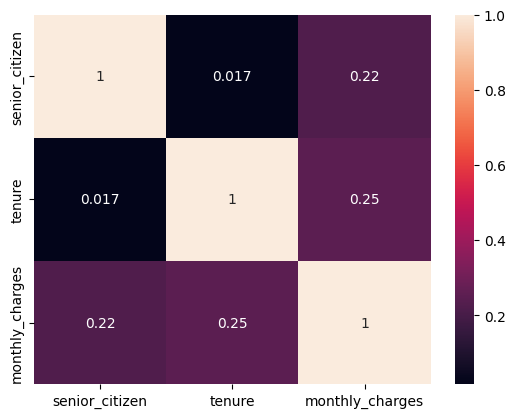

In [27]:
# Checking multicolinearity between the X features

correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

There is no high multicolinearity so we don't have to drop any columns.

## 4. Build the logistic regression model

### Train, Test, Split

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (5634, 3)
y_train shape is: (5634,)
X_test shape is: (1409, 3)
y_test shape is: (1409,)


In [30]:
X_train.head()

,senior_citizen,tenure,monthly_charges
2142,0,21,64.85
1623,0,54,97.20
6074,0,1,23.45
1362,0,4,70.20
6754,0,0,61.90


In [31]:
X_test.head()

,senior_citizen,tenure,monthly_charges
185,0,1,24.80
2715,0,41,25.25
3825,0,52,19.35
1807,0,1,76.35
132,0,67,50.55


In [32]:
# All features are numerical

### Scaling numerical columns

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
# Scale numerical train data

transformer = MinMaxScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
print(X_train_norm.shape)
X_train_scale = pd.DataFrame(X_train_norm, index = X_train.index, columns=X_train.columns)
X_train_scale.head()

(5634, 3)


,senior_citizen,tenure,monthly_charges
2142,0.0,0.291667,0.464375
1623,0.0,0.750000,0.786746
6074,0.0,0.013889,0.051819
1362,0.0,0.055556,0.517688
6754,0.0,0.000000,0.434978


In [35]:
# Same for test data

X_test_norm = transformer.transform(X_test)
print(X_test_norm.shape)
X_test_scale = pd.DataFrame(X_test_norm, index = X_test.index, columns=X_test.columns)
X_test_scale.head()

(1409, 3)


,senior_citizen,tenure,monthly_charges
185,0.0,0.013889,0.065272
2715,0.0,0.569444,0.069756
3825,0.0,0.722222,0.010962
1807,0.0,0.013889,0.578974
132,0.0,0.930556,0.321873


## 5. Evaluate the model

In [36]:
# Import the LogisticRegression class from scikit-learn
# Create an instance of LogisticRegression with specified parameters
# Fit (train) the logistic regression model using the standardized training data
# Evaluate the model's accuracy on the standardized test data

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state =0, solver='lbfgs').fit(X_train_scale,y_train)
accuracy = classification.score(X_test_scale, y_test)
accuracy

0.8041163946061036

## 6. Even a simple model will give us more than 70% accuracy. Why?

With a simple model we get a high accuracy score of .80. 

This can be due to several reasons:

- As the barplot in cell 18 shows there is a very big imbalance between Yes (1) and No (0) churns with one class dominating over the other. There are more than double No's than Yesses. For example, if 70% of the customers do not churn (Churn = No = 0), even a model that predicts "No" for all records would have an accuracy of 70%.
- The selected features (tenure, SeniorCitizen, MonthlyCharges) may have a strong correlation with the target variable, making the classification task easier.

In [37]:
# The precision, recall and F1 score show this imbalance better in scores
# The score lowered to 0.46 for recall, showing it's not a very good model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

predictions = classification.predict(X_test_scale)

print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))

precision:  0.6932270916334662
recall:  0.46648793565683644
f1:  0.5576923076923076


In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[959,  77],
       [199, 174]])

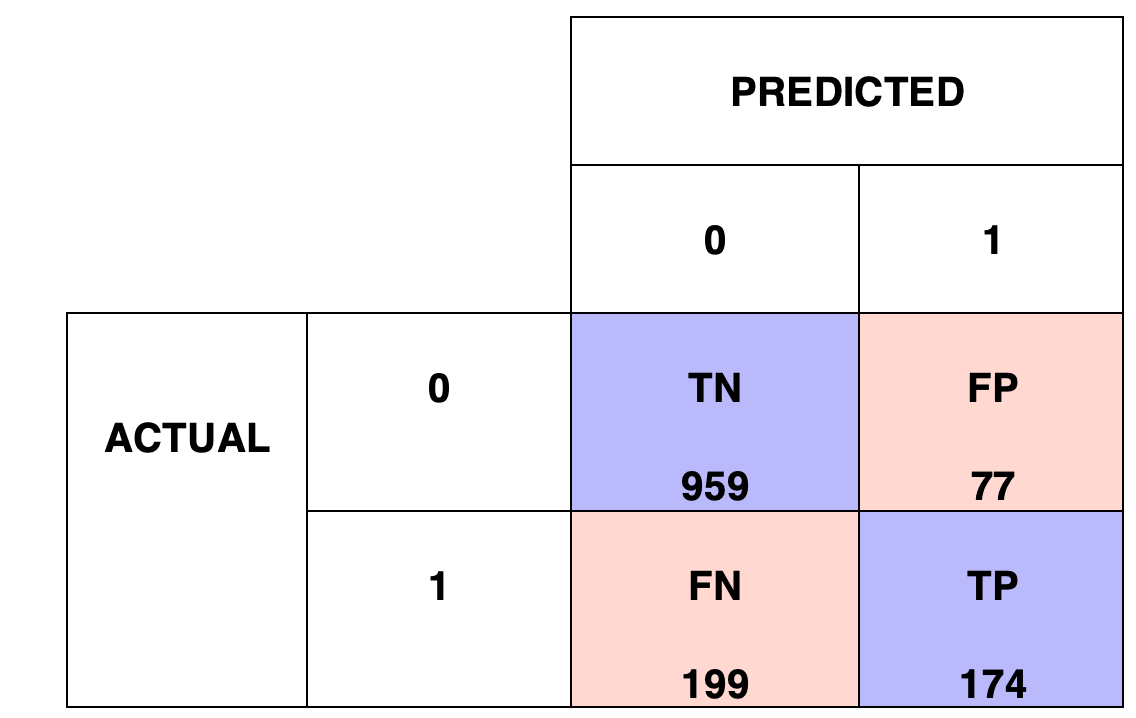

### 0: Subscription not cancelled
### 1: Cancelled Subscription

## 7. Apply SMOTE to the dataset. Build and evaluate the logistic regression model. 

To try and improve the model we are going to use the SMOTE method to lose the imbalance in the data and try to get a higher score.

In [39]:
!pip install imbalanced-learn

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scale,y_train)

In [42]:
class_smote = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train_SMOTE,y_train_SMOTE)
accuracy = class_smote.score(X_test_scale, y_test)
accuracy

0.7452093683463449

In [43]:
pred_smote = class_smote.predict(X_test_scale)

print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

precision:  0.5125448028673835
recall:  0.7667560321715817
f1:  0.6143931256713211


In [44]:
pred_smote

array([0, 0, 0, ..., 0, 0, 1])

In [45]:
confusion_matrix(y_test,pred_smote)

array([[764, 272],
       [ 87, 286]])

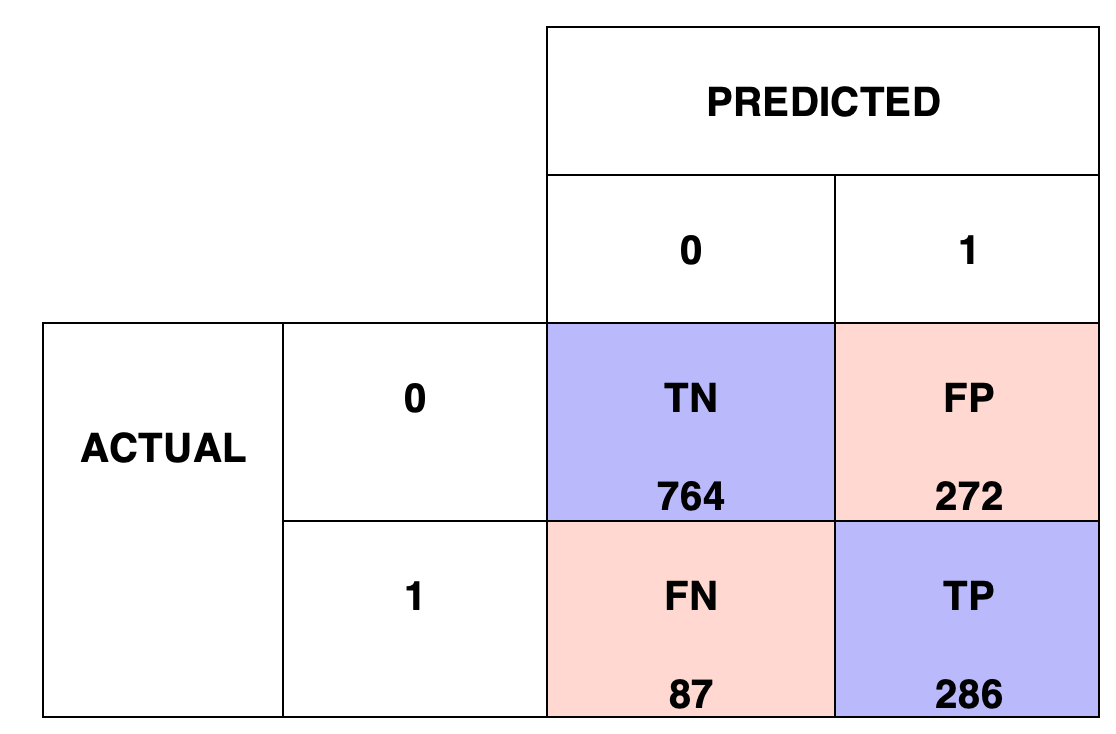

In [46]:
print("Now the recall after SMOTE is: ",recall_score(y_test,pred_smote))

Now the recall after SMOTE is:  0.7667560321715817


## Is it there any improvement?

Yes, the SMOTE improved the model.

- The accuracy is lower but the confusion matrix show more balanced predictions. 
- Recall is higher after applying SMOTE, it means that the classification model is better at identifying the minority class (in this case, "Churn = Yes = 1 = cancelled subscription") compared to before applying SMOTE. Recall refers to the model's ability to correctly identify all positive cases in the dataset.

**Now the model is more capable of correctly identifying customers who will indeed churn from the service.**

In other words, a higher recall after applying SMOTE means that the model has an improved ability to detect churn cases, which can be beneficial in situations where losing those customers is costly or problematic. However, it's important to balance recall with other evaluation metrics like precision and F1-score to get a comprehensive understanding of the model's performance.